# Expectation–maximization algorithm / Gaussian Mixture Model

In [1]:
import pandas as pd
import sympy as sym
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from pylab import *
from scipy import misc
from sympy import *
from tabulate import tabulate
from numpy import array, diag, dot, maximum, empty, repeat, ones, sum
from numpy.linalg import inv
import seaborn as sns
from numpy import linalg as LA
import pandas as pd 
import matplotlib.pyplot as plt  
import functools as fts
from tabulate import tabulate as tabulate
from scipy.stats import norm
from scipy.optimize import fmin
from scipy.stats import *
from scipy.special import factorial
from scipy.stats import bernoulli
from scipy.stats import poisson
import numpy as np
from sklearn import mixture
from sklearn.mixture import GaussianMixture
from scipy.stats import norm, multivariate_normal
# import warnings
# warnings.filterwarnings("ignore")

# 1. Use the EM algorithm to ﬁt a $(1−\pi)$ : $\pi $ mixture of two Poisson distributions, Poisson ($\lambda_1$) and Poisson($\lambda_2$), to the following data:

## Values

In [2]:
I=np.arange(0,10)

## Frequency

In [3]:
N= np.array([162,267, 271, 185, 111, 61, 27, 8, 3, 1])

In [4]:
sum(N)

1096

## (a) Derive the EM algorithm for the maximum likelihood estimates of $\pi$, $\lambda_1$, $\lambda_2$. Present your derivation in a Markdown cell in the Jupyter Notebook. 

### Mixture of two Poisson distributions

\begin{align}
& f_y\left(x|\theta \right) = \pi\frac{{\lambda_1}^{x}}{x!} \exp(-{\lambda_1}) + (1-\pi)\frac{{\lambda_2}^{x}}{x!}\exp(-{\lambda_2}) \\ \end{align}

\begin{equation}
\theta = (\pi,\lambda_1,\lambda_2)^T \\ 
\end{equation}

The complete data are:

\begin{equation}
Y = (Y_1, ... , Y_N)^T \\
\end{equation}

The observed data are:

\begin{equation}
X = (X_1, ... , X_N)^T \\
\end{equation}

The missing data are:

\begin{equation}
Z = (Z_1, ... , Z_N)^T \\
\end{equation}

Deﬁne the group indicator as:

\begin{equation}
Z_1 = \begin{cases} 1 & for Y_i~Poisson(\lambda_1)\\ 2 & for Y_i~Poisson(\lambda_2) \\ \end{cases} \\
\end{equation}

Assume $Z_i \overset{iid}{\sim} Binomial(1,\pi)$ 

\begin{equation}
Z_i = Binomial(1,\pi) \\
\end{equation}

The likelihood for the observed data is:

\begin{equation}
L(\theta|X) = \prod_{n=1}^{1096}f_y\left(X_n|\theta \right) \\
\end{equation}

\begin{equation}
m_k = \sum_{i:X_i=k}^{1} Z_i, k = 0, ..., 9\\
\end{equation}

Let $n = 1096$, $n_k = \#\{i : X_i = k\}$. The complete-data likelihood is: 

\begin{equation}
L_n(\theta|X,Z) = \prod_{i=1}^{n}\pi^{Z_i}(1-\pi)^{1-Z_i} \left(\frac{{\lambda_1}^{x}}{x!} \exp(-{\lambda_1}) \right)^{Z_i} + \left(\frac{{\lambda_2}^{x}}{x!}\exp(-{\lambda_2}) \right)^{1-Z_i}\\
\end{equation}

\begin{equation}
L_n(\theta|X,Z) = \prod_{k=0}^{\infty}\pi^{m_k}(1-\pi)^{n_k-m_k} \left(\frac{{\lambda_1}^{x}}{x!} \exp(-{\lambda_1}) \right)^{m_k} + \left(\frac{{\lambda_2}^{x}}{x!}\exp(-{\lambda_2}) \right)^{n_k-m_k}\\
\end{equation}

now the loglikelihood fucntion can be computed as:

\begin{equation}
l_n(\theta|X,Z) = \sum_{k}^{}(m_k\log{\pi} + (n_k - m_k)\log(1-\pi)) +\sum_{k}^{}m_k(k\log\lambda_1 - \lambda_1) + \sum_{k}^{}(n_k - m_k)(k\log\lambda_2 - \lambda_2)-  \sum_{k}^{} n_k(\log{k!})  \\
\end{equation}

E step:

Given $\theta^{(t)} = (\pi^{(t)},\lambda_1^{(t)},\lambda_2^{(t)})^T $, then $Z_i|X$, $X_i = k$, $\theta^{(t)} ∼ Bin(1,\pi^{(t)}_k )$, where


\begin{equation}
\pi_{k}^{(t)} = \frac{\pi^{(t)}.\frac{{\lambda_{1}^{(t)}}^k}{k}\exp(-\lambda_{1}^{(t)})}{\pi^{(t)}.\frac{{\lambda_{1}^{(t)}}^k}{k}\exp(-\lambda_{1}^{(t)}) + (1 - \pi^{(t)}).\frac{{\lambda_{2}^{(t)}}^k}{k}\exp(-\lambda_{2}^{(t)})} \\
\end{equation}

Therefore,

\begin{equation}
m_k^{(t)} := E(m_k|X,\theta^{(t)}) = \sum_{i:X_i=k}^{1} \pi_{k}^{(t)} = n_k \pi_{k}^{(t)} \\
\end{equation}

Substituting $m_k^{(t)}$ for $m_k$ in $l_n(\theta|X,Z)$, we will get $Q(\theta|\theta^{(t)})$. 

\begin{equation}
Q(\theta|\theta^{(t)}) = \sum_{k}^{}(n_k \pi_{k}^{(t)}\log{\pi} + (n_k - n_k \pi_{k}^{(t)})\log(1-\pi)) +\sum_{k}^{}n_k \pi_{k}^{(t)}(k\log\lambda_1 - \lambda_1) + \sum_{k}^{}(n_k - n_k \pi_{k}^{(t)})(k\log\lambda_2 - \lambda_2)-  \sum_{k}^{} n_k(\log{k!})  \\
\end{equation}

 M step:

Setting the ﬁrst derivatives of $Q(\theta|\theta^{(t)})$ equal to zero, we get:

\begin{equation}
\pi^{(t+1)} = \frac{\sum_{k}{}n_k \pi_k^{(t)}}{n} \\
\end{equation}

\begin{equation}
\lambda_1^{(t+1)} = \frac{\sum_{k}{}k n_k \pi_k^{(t)}}{\sum_{k}{}n_k \pi_k^{(t)}} \\
\end{equation}

\begin{equation}
\lambda_2^{(t+1)} = \frac{\sum_{k}{}k n_k (1-\pi_k^{(t)})}{\sum_{k}{}n_k (1-\pi_k^{(t)})} \\
\end{equation}

## (b) Implementing the EM algorithm for this data set. Present the output of your code in the format similar to Table 4.1 on page 102 of the book Computational Statistics.

## Initial Theta

## $\theta^{(0)}=(\pi^{(0)}, \lambda_1^{(0)}, \lambda_2^{(0)})^T$

In [5]:
theta_init=np.array([0.3,1,3])

In [6]:
theta_init

array([0.3, 1. , 3. ])

In [7]:
def emstep(N,theta):
    I=np.arange(0,10)
    EZ=N*theta[0]*poisson.pmf(I, theta[1])/((theta[0]*poisson.pmf(I, theta[1]))+(1-theta[0])*poisson.pmf(I, theta[2]))
    theta[0]=sum(EZ)/sum(N)
    theta[1]=sum(EZ*I)/sum(EZ)
    theta[2]=sum((N-EZ)*I)/sum(N-EZ)
    return theta

In [8]:
def emiteration(Y,theta,n=10):
    print('iteration|   p        | lambda 1| lambda 2   |    R  | D_p    |D_lambda 1|  D_lambda 2   ')
    print('-'*90);
    print('    0    |   0.3      |  1.0    | 3.0        |       |        |          |               ')
    print('-'*90);
    for i in range (1,n):
        theta_old=theta.copy()
        #print(theta_old)
        theta=emstep(Y,theta)
        #print(theta)
        D_P = (theta[0] - 0.35926675) / (theta_old[0] - 0.35926675)
        #print(D_P)
        D_lambda_1 = (theta[1] - 1.25501887) / (theta_old[1] - 1.25501887)
        D_lambda_2 = (theta[2] - 2.66264902) / (theta_old[2] - 2.66264902)
        R = LA.norm((theta[0:2] - theta_old[0:2]), 2) / LA.norm(theta_old[0:2], 2)
        #R =(theta - theta_old) / theta_old
        #print (R)
        #print('    0    |          0.3      |  1.0        | 3.0     |              |              |              |            ')
        print(f'{i:7.3f}  | {theta[0]:7.3f}   | {theta[1]:7.3f}  |  {theta[2]:7.3f}   |{R:7.3f}| {D_P:7.3f}|  {D_lambda_1:7.3f} |  {D_lambda_2:7.3f} ')
        print('-'*90)
    return theta

In [9]:
theta_hat=emiteration(N,theta_init,2000)

iteration|   p        | lambda 1| lambda 2   |    R  | D_p    |D_lambda 1|  D_lambda 2   
------------------------------------------------------------------------------------------
    0    |   0.3      |  1.0    | 3.0        |       |        |          |               
------------------------------------------------------------------------------------------
  1.000  |   0.324   |   1.007  |    2.708   |  0.024|   0.592|    0.971 |    0.135 
------------------------------------------------------------------------------------------
  2.000  |   0.320   |   1.058  |    2.673   |  0.049|   1.130|    0.793 |    0.224 
------------------------------------------------------------------------------------------
  3.000  |   0.317   |   1.092  |    2.651   |  0.030|   1.067|    0.830 |   -1.122 
------------------------------------------------------------------------------------------
  4.000  |   0.315   |   1.114  |    2.637   |  0.020|   1.038|    0.862 |    2.221 
-------------------------

------------------------------------------------------------------------------------------
233.000  |   0.342   |   1.225  |    2.642   |  0.000|   0.995|    0.995 |    0.995 
------------------------------------------------------------------------------------------
234.000  |   0.342   |   1.225  |    2.642   |  0.000|   0.995|    0.995 |    0.995 
------------------------------------------------------------------------------------------
235.000  |   0.343   |   1.225  |    2.642   |  0.000|   0.995|    0.995 |    0.995 
------------------------------------------------------------------------------------------
236.000  |   0.343   |   1.225  |    2.642   |  0.000|   0.995|    0.995 |    0.995 
------------------------------------------------------------------------------------------
237.000  |   0.343   |   1.226  |    2.642   |  0.000|   0.995|    0.995 |    0.995 
------------------------------------------------------------------------------------------
238.000  |   0.343   |   1.22

520.000  |   0.355   |   1.247  |    2.657   |  0.000|   0.995|    0.995 |    0.995 
------------------------------------------------------------------------------------------
521.000  |   0.355   |   1.247  |    2.657   |  0.000|   0.995|    0.995 |    0.995 
------------------------------------------------------------------------------------------
522.000  |   0.355   |   1.247  |    2.657   |  0.000|   0.995|    0.995 |    0.995 
------------------------------------------------------------------------------------------
523.000  |   0.355   |   1.247  |    2.657   |  0.000|   0.995|    0.995 |    0.995 
------------------------------------------------------------------------------------------
524.000  |   0.355   |   1.248  |    2.657   |  0.000|   0.995|    0.995 |    0.995 
------------------------------------------------------------------------------------------
525.000  |   0.355   |   1.248  |    2.657   |  0.000|   0.995|    0.995 |    0.995 
-----------------------------------

------------------------------------------------------------------------------------------
813.000  |   0.358   |   1.254  |    2.662   |  0.000|   0.992|    0.992 |    0.992 
------------------------------------------------------------------------------------------
814.000  |   0.358   |   1.254  |    2.662   |  0.000|   0.992|    0.992 |    0.992 
------------------------------------------------------------------------------------------
815.000  |   0.359   |   1.254  |    2.662   |  0.000|   0.992|    0.992 |    0.992 
------------------------------------------------------------------------------------------
816.000  |   0.359   |   1.254  |    2.662   |  0.000|   0.992|    0.992 |    0.992 
------------------------------------------------------------------------------------------
817.000  |   0.359   |   1.254  |    2.662   |  0.000|   0.992|    0.992 |    0.992 
------------------------------------------------------------------------------------------
818.000  |   0.359   |   1.25

1111.000  |   0.360   |   1.255  |    2.663   |  0.000|   1.007|    1.007 |    1.007 
------------------------------------------------------------------------------------------
1112.000  |   0.360   |   1.255  |    2.663   |  0.000|   1.007|    1.007 |    1.007 
------------------------------------------------------------------------------------------
1113.000  |   0.360   |   1.255  |    2.663   |  0.000|   1.007|    1.007 |    1.007 
------------------------------------------------------------------------------------------
1114.000  |   0.360   |   1.255  |    2.663   |  0.000|   1.007|    1.007 |    1.007 
------------------------------------------------------------------------------------------
1115.000  |   0.360   |   1.255  |    2.663   |  0.000|   1.007|    1.007 |    1.007 
------------------------------------------------------------------------------------------
1116.000  |   0.360   |   1.255  |    2.663   |  0.000|   1.007|    1.007 |    1.007 
-----------------------------

1419.000  |   0.360   |   1.256  |    2.663   |  0.000|   1.001|    1.001 |    1.001 
------------------------------------------------------------------------------------------
1420.000  |   0.360   |   1.256  |    2.663   |  0.000|   1.001|    1.001 |    1.001 
------------------------------------------------------------------------------------------
1421.000  |   0.360   |   1.256  |    2.663   |  0.000|   1.001|    1.001 |    1.001 
------------------------------------------------------------------------------------------
1422.000  |   0.360   |   1.256  |    2.663   |  0.000|   1.001|    1.001 |    1.001 
------------------------------------------------------------------------------------------
1423.000  |   0.360   |   1.256  |    2.663   |  0.000|   1.001|    1.001 |    1.001 
------------------------------------------------------------------------------------------
1424.000  |   0.360   |   1.256  |    2.663   |  0.000|   1.001|    1.001 |    1.001 
-----------------------------

1719.000  |   0.360   |   1.256  |    2.663   |  0.000|   1.000|    1.000 |    1.000 
------------------------------------------------------------------------------------------
1720.000  |   0.360   |   1.256  |    2.663   |  0.000|   1.000|    1.000 |    1.000 
------------------------------------------------------------------------------------------
1721.000  |   0.360   |   1.256  |    2.663   |  0.000|   1.000|    1.000 |    1.000 
------------------------------------------------------------------------------------------
1722.000  |   0.360   |   1.256  |    2.663   |  0.000|   1.000|    1.000 |    1.000 
------------------------------------------------------------------------------------------
1723.000  |   0.360   |   1.256  |    2.663   |  0.000|   1.000|    1.000 |    1.000 
------------------------------------------------------------------------------------------
1724.000  |   0.360   |   1.256  |    2.663   |  0.000|   1.000|    1.000 |    1.000 
-----------------------------

1998.000  |   0.360   |   1.256  |    2.663   |  0.000|   1.000|    1.000 |    1.000 
------------------------------------------------------------------------------------------
1999.000  |   0.360   |   1.256  |    2.663   |  0.000|   1.000|    1.000 |    1.000 
------------------------------------------------------------------------------------------


In [10]:
emstep(N,theta_hat)

array([0.35987736, 1.25608113, 2.66339454])

In [11]:
ans=theta_hat[0]*poisson.pmf(I, theta_hat[1])+(1-theta_hat[0])*poisson.pmf(I, theta_hat[2])
result=ans*1096

In [12]:
prob=theta_hat[0]*poisson.pmf(I, theta_hat[1])+(1-theta_hat[0])*poisson.pmf(I, theta_hat[2])

## (c) In a single plot, show the relative frequency and ﬁtted probability for the observed data, respectivelly, with appropriate legend. 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


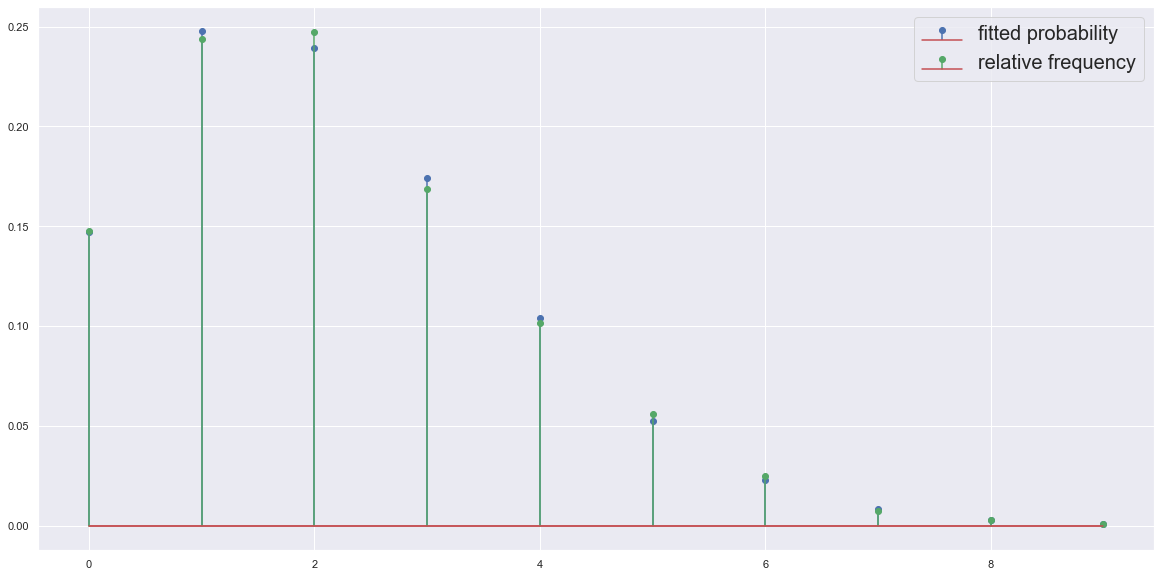

In [13]:
plt.figure(figsize=(20,10))
x = I
y = prob
y1=N/1096
plt.stem(x, y,use_line_collection=True,markerfmt='bo',label='ﬁtted probability')
plt.stem(x, y1,'g',markerfmt='go',label='relative frequency')
plt.legend(prop={"size":20})
plt.show()

In [14]:
print('The relative frequency is:',y)

The relative frequency is: [0.14710519 0.2475756  0.23911749 0.17436353 0.10419064 0.0525084
 0.02268212 0.00851782 0.00281814 0.00083152]


In [15]:
print('The fitted probability is:',y1)

The fitted probability is: [0.14781022 0.24361314 0.24726277 0.16879562 0.10127737 0.05565693
 0.02463504 0.00729927 0.00273723 0.00091241]


## (d) What is the probability that the value 10 will be observed ?

In [16]:
print('The probability of value 10 is:',theta_hat[0]*poisson.pmf(I, theta_hat[1])+(1-theta_hat[0])*poisson.pmf(I, theta_hat[2]))

The probability of value 10 is: [0.14710519 0.2475756  0.23911749 0.17436353 0.10419064 0.0525084
 0.02268212 0.00851782 0.00281814 0.00083152]


# **Problem 2**

## Gaussian Distribution or Normal distribution Mixture Model

In **GMM** (Gaussian Mixture Model), each cluster corresponds to a probability distribution, in this case the Gaussian distribution. What we want to do is to learn the parameters of these distributions, which is the Gaussian's mean $\mu$ (mu), and the variance $\sigma^2$ (sigma).

The mathematical form of the Gaussian distribution in 1-dimension (univariate Gaussian) can be written as:

$$N(x \mid \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\dfrac{(x-\mu)^2}{2\sigma^2}}$$


The form of a d-dimensional gaussian:

$$N(x \mid \mu,\Sigma) = \frac{1}{(2\pi)^{d/2}\sqrt{|\Sigma|}}exp(-\dfrac{1}{2}(x-\mu)^{T}\Sigma^{-1}(x-\mu))$$

In higher dimensions, a Gaussian is fully specified by a mean vector $\boldsymbol{\mu}$ and a d-by-d covariance matrix, $\boldsymbol{\Sigma}$ (do not confused this symbol with $\sum$, which is used for denoting summing a bunch of stuff). $|\Sigma|$ refers to the determinant of the covariance matrix e.g. In two dimension, the Gaussian's parameters might look like this:

$$N
\begin{bmatrix}
\begin{pmatrix}
\mu_1\\
\mu_2
\end{pmatrix}\, ,
\begin{pmatrix}
\sigma^2_1 & \sigma_{12} \\
\sigma_{21} & \sigma^2_2
\end{pmatrix}
\end{bmatrix}
$$

The mean vector, containing elements $\mu_1$ and $\mu_1$ centers the distribution along every dimension. On the other hand, the covariance matrix specifies the spread and orientation of the distribution. Along the diagonal of this covariance matrix we have the variance terms $\sigma^2_1$ and $\sigma^2_2$ representing the shape (spread) along each of the dimensions. But then we also have the off-diagonal terms, $\sigma_{12}$ and $\sigma_{21}$ (these two thing actually take the same value because this a symmetric matrix) that specify the correlation structure of the distribution.

## Parameter Estimation

Since we know which data came from which Gaussian distribution, all we need to do is to compute the mean and the variance for both groups and lo and behold we get our estimates for the two Gaussian.

We have a bunch of data points, we suspect that they came from $K$ different guassians, but we have no clue which data points came from which guassian. To solve this problem, we use the **EM algorithm**. The way it works is that it will start by placing guassians randomly (generate random mean and variance for the guassian). Then it will iterate over these two steps until it converges.

- **E step:** With the current means and variances, it's going to figure out the probability of each data point $x_i$ coming from each guassian.
- **M step:** Once it computed these probability assignments it will use these numbers to re-estimate the guassians' mean and variance to better fit the data points.

### E Step

Recall that **GMM**'s goal is to output a set of soft assignments per data point (allocating the probability of that data point belonging to each one of the clusters). To begin with, let's just assume we actually know the parameters $\pi_k$, $\mu_k$ and $\Sigma_k$ (from some random initialization) and we need a formula to compute the soft assignments having fixed the values of all the other parameters.

$$r_{ik} = \frac{ \pi_k N(x_i \mid \mu_k,\Sigma_k) }{ \sum_{j=1}^K \pi_j N(x_i \mid \mu_j,\Sigma_j) }$$

Let's break this down piece by piece. The soft assignments are quantified by the responsibility vector $r$. For each observation $i$, we form a responsibility vector with elements $r_{i1}$, $r_{i2}$, all the way up to $r_{iK}$. Where $K$ is the total number of clusters, or often referred to as the number of components. The cluster responsibilities for a single data point $i$ should sum to 1.

The name Mixture of Gaussians comes from the notion that, in order to model more complex data distribution, we can use a linear combination of several Gaussians instead of using just one. To compute the mixture of Gaussians, we introduce a set of cluster weights, $\pi_k$, one for each cluster $k$. Where $\sum_{k=1}^K \pi_k = 1$ and $0 \leq \pi_k \leq 1$ (meaning that the sum must add up to one and each of them is between 0 and 1). This parameter tells us what's the prior probability that the data point in our data set $x$ comes from the $k_{th}$ cluster. We can think it as controlling each cluster's size.

The next part of the equation, $N(x_i \mid \mu_k,\Sigma_k)$ tells us: Given that we knew that the observation comes from the $k_{th}$ cluster, what is the likelihood of observing our data point $x_i$ coming from this cluster. To compute this part, the scipy package provides a convenient function `multivariate_normal.pdf` that computes the likelihood of seeing a data point in a multivariate Gaussian distribution.

After multiplying the prior and the likelihood, we need to normalize over all possible cluster assignments so that the responsibility vector becomes a valid probability. And this is essentially the computation that's done for the E step.

### M Step

After computing the responsibility vector for the current iteration, we then use it to update **GMM**'s parameter.

$$
\begin{align*}
N_k^{soft} &= \sum_{i=1}^N r_{ik} \\ \nonumber
\pi_k &= \frac{N_k^{soft}}{N_k} \\ \nonumber
\hat{\mu}_k &= \frac{1}{N_k^{soft}} \sum_{i=1}^N r_{ik} x_i \\ \nonumber
\hat{\Sigma}_k &= \frac{1}{N_k^{soft}} \sum_{i=1}^N r_{ik} (x_i-\hat{\mu}_k)(x_i - \hat{\mu}_k)^T \nonumber
\end{align*}
$$

First, the cluster weights $\pi_k$, show us how much each cluster is represented over all data points (each cluster's relative size). This weight is given by the ratio of the soft count $N^{\text{soft}}_{k}$ over the total number of data points $N$.

When updating our parameters' estimates for each cluster $k$, we need to account for the associated weights $r_{ik}$ for every one of our observation. So every time we're touching a data point $x_i$ it's going to be multiplied by $r_{ik}$.

Another thing that's worth noticing is that, when we're updating the parameter $\hat{\mu}_k$ and $\hat{\Sigma}_k$, instead of dividing the summation with the raw count of the total number of data points in that cluster $N_k$, we will use the effective number of observations in that cluster (the sum of the responsibilities in that cluster) as the denominator. This is denoted as $N_k^{soft}$.  

## Assessing Convergence

Apart from training the model, we also want a way to monitor the convergence of the algorithm. We do so by computing the log likelihood of the data given the current estimates of our model parameters and responsibilities.

Recall that during the E step of the algorithm, we used the formula:

$$\sum_{j=1}^K \pi_j N(x_i \mid \mu_j,\Sigma_j)$$

To compute the weighted probability of our data point $x_i$ coming from each cluster $j$ and summed up all the weighted probability. If we were to assume the observed data points were generated independently, the likelihood of the data can be written as:

$$p(X \mid \pi, \mu,\Sigma)=\prod_{n=1}^{N} \sum_{j=1}^K \pi_j N(x_i \mid \mu_j,\Sigma_j)$$

This basically means that we multiply all the probability for every data point together to obtain a single number that estimates the likelihood of the data fitted under the model's parameter. We can take the log of this likelihood so that the product becomes a sum and it makes the computation a bit easier:

$$
ln \left( p(X \mid \pi,\mu,\Sigma) \right) = \sum^N_{i=1} ln\{\sum^K_{j=1}\pi_j
N (x_i \mid \mu_j,\Sigma_j)\}
$$

Given this formula, we can use it and say: If the log likelihood of the data occuring under the current model's parameter does not improve by a tolerance value that we've pre-specified, then the algorithm is deemed converged.

## Implementing the EM algorithm

### Load the data

In [17]:
data=pd.read_csv('data_mvnorm2mix.csv')

In [18]:
data=np.array(data)

### Data visualization

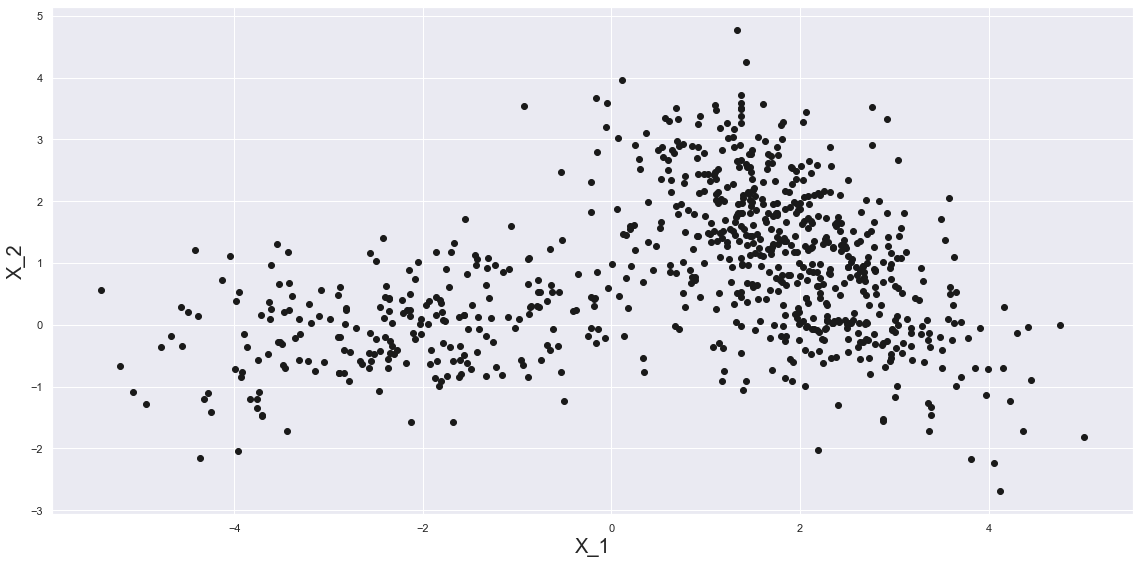

In [19]:
fig = plt.figure(figsize = (16,8))
X=data
plt.plot(X[:, 0], X[:, 1], 'ko')
plt.xlabel('X_1',fontsize=20)
plt.ylabel('X_2',fontsize=20)
plt.tight_layout()

We can consider two clusters for the data.

### Initial guess

In [20]:
# Model parameters, including the mean
# covariance matrix and the weights for each cluster
init_means = np.array([
    [5, 0],
    [1, 1]
])

init_covariances = np.array([
    [[.5, 0.], [0, .5]],
    [[.92, .38], [.38, .91]],
])

init_weights = [1 / 4, 1 / 2]

Defining the function to compute the parameters of mixed normal distribution

In [21]:
class GMM:
    """
    Full covariance Gaussian Mixture Model,
    trained using Expectation Maximization.

    Parameters
    ----------
    n_components : int
        Number of clusters/mixture components in which the data will be
        partitioned into.

    n_iters : int
        Maximum number of iterations to run the algorithm.

    tol : float
        Tolerance. If the log-likelihood between two iterations is smaller than
        the specified tolerance level, the algorithm will stop performing the
        EM optimization.

    seed : int
        Seed / random state used to initialize the parameters.
    """

    def __init__(self, n_components: int, n_iters: int, tol: float, seed: int):
        self.n_components = n_components
        self.n_iters = n_iters
        self.tol = tol
        self.seed = seed
        self.log_likelihood =0

    def fit(self, X):

        # data's dimensionality and responsibility vector
        n_row, n_col = X.shape     
        self.resp = np.zeros((n_row, self.n_components))

        # initialize parameters
        np.random.seed(self.seed)
        chosen = np.random.choice(n_row, self.n_components, replace = False)
        self.means = X[chosen]
        self.weights = np.full(self.n_components, 1 / self.n_components)
        
        # for np.cov, rowvar = False, 
        # indicates that the rows represents obervation
        shape = self.n_components, n_col, n_col
        self.covs = np.full(shape, np.cov(X, rowvar = False))

        log_likelihood = 0
        self.converged = False
        self.log_likelihood_trace = []      

        for i in range(self.n_iters):
            log_likelihood_new = self._do_estep(X)
            self._do_mstep(X)

            if abs(log_likelihood_new - log_likelihood) <= self.tol:
                self.converged = True
                break
  
            self.log_likelihood = log_likelihood_new
            self.log_likelihood_trace.append(self.log_likelihood)
            #print('likelihood is:',self.log_likelihood_trace)

        #print('likelihood is:',self.log_likelihood_trace)
        return self

    def _do_estep(self, X):
        """
        E-step: compute responsibilities,
        update resp matrix so that resp[j, k] is the responsibility of cluster k for data point j,
        to compute likelihood of seeing data point j given cluster k, use multivariate_normal.pdf
        """
        self._compute_log_likelihood(X)
        log_likelihood = np.sum(np.log(np.sum(self.resp, axis = 1)))

        # normalize over all possible cluster assignments
        self.resp = self.resp / self.resp.sum(axis = 1, keepdims = 1)
        return log_likelihood

    def _compute_log_likelihood(self, X):
        for k in range(self.n_components):
            prior = self.weights[k]
            likelihood = multivariate_normal(self.means[k], self.covs[k]).pdf(X)
            self.resp[:, k] = prior * likelihood

        return self

    def _do_mstep(self, X):
        """M-step, update parameters"""

        # total responsibility assigned to each cluster, N^{soft}
        resp_weights = self.resp.sum(axis = 0)
        
        # weights
        self.weights = resp_weights / X.shape[0]

        # means
        weighted_sum = np.dot(self.resp.T, X)
        self.means = weighted_sum / resp_weights.reshape(-1, 1)
        # covariance
        for k in range(self.n_components):
            diff = (X - self.means[k]).T
            weighted_sum = np.dot(self.resp[:, k] * diff, diff.T)
            self.covs[k] = weighted_sum / resp_weights[k]
            
        return self

Next, we will run our EM algorithm to discover the mixture components and visualize its output. When working with low-dimensional data, one useful way of testing our implementation is to visualize the gaussian components over the data at different points in the algorithm's execution:

- At initialization
- After running the algorithm to completion (convergence)

In [22]:
def plot_contours(data, weights,means, covs, title):
    """visualize the gaussian components over the data"""
    fig = plt.figure(figsize = (16,8))
    delta = 0.025
    k = means.shape[0]
    x = np.arange(-7.5, 7.5, delta)
    y = np.arange(-7.5, 7.5, delta)
    x_grid, y_grid = np.meshgrid(x, y)
    coordinates = np.array([x_grid.ravel(), y_grid.ravel()]).T
    ax = plt.axes(projection='3d')
    z_grid = weights[0]*multivariate_normal(means[0], covs[0]).pdf(coordinates).reshape(x_grid.shape)+weights[1]*multivariate_normal(means[1], covs[1]).pdf(coordinates).reshape(x_grid.shape)
    ax.plot_surface(x_grid, y_grid, z_grid,cmap=plt.cm.Spectral)
    ax.set_xlabel('X_1',fontsize=16)
    ax.set_ylabel('X_2',fontsize=16)
    ax.set_zlabel('PDF',fontsize=16)
    plt.title(title,fontsize=24)
    plt.tight_layout()

In [23]:
# use our implementation of the EM algorithm 
# and fit a mixture of Gaussians to the simulated data
gmm = GMM(n_components = 2, n_iters = 100, tol = 1e-4, seed = 4)
a = gmm.fit(X)

## (a) Print the MLE of the parameter $\theta$. 

$\theta=[\pi,\mu_1,\mu_2,\Sigma_1,\Sigma_2]$

The $\pi_1$ is:

In [24]:
print('the \u03C0_1 (weight of first normal distribution) is:',a.weights[0])

the π_1 (weight of first normal distribution) is: 0.3081200738687437


The $\pi_2$ that is $1-\pi_1$ is:

In [25]:
print('the \u03C0_2 (weight of second normal distribution) is:',a.weights[1])

the π_2 (weight of second normal distribution) is: 0.691879926131257


The $\mu_1$ is:

In [26]:
print('the \u03BC_1 is:',a.means[0])

the μ_1 is: [-2.0044957   0.02217512]


The $\mu_2$ is:

In [27]:
print('the \u03BC_2 is:',a.means[1])

the μ_2 is: [1.97673277 1.15430445]


The $\Sigma_1$ is:

In [28]:
print('The \u03A3_1 (covariance matrix 1) is:')
print(a.covs[0])

The Σ_1 (covariance matrix 1) is:
[[2.01010171 0.35373339]
 [0.35373339 0.54006335]]


The $\Sigma_2$ is:

In [29]:
print('the \u03A3_2 (covariance matrix 2) is:',a.covs[1])

the Σ_2 (covariance matrix 2) is: [[ 0.84339551 -0.66309604]
 [-0.66309604  1.50319884]]


We can compare our results with GMM from sklearn:

In [30]:
gmm_sklearn = mixture.GaussianMixture(n_components=2).fit(X)

The weights are:

In [31]:
gmm_sklearn.weights_

array([0.6961428, 0.3038572])

The means are:

In [32]:
gmm_sklearn.means_

array([[ 1.96983758,  1.15219054],
       [-2.04455214,  0.01113526]])

The covariances are:

In [33]:
gmm_sklearn.covariances_

array([[[ 0.84895719, -0.65746549],
        [-0.65746549,  1.4979974 ]],

       [[ 1.91543518,  0.32855544],
        [ 0.32855544,  0.53132348]]])

As we can see, the results of our code is completely similar to GMM in sklearn.

## (b) Plot the value of the log-likelihood function vs iteration number. Comment on the pattern of the plot. 

In [34]:
MLE=a.log_likelihood_trace

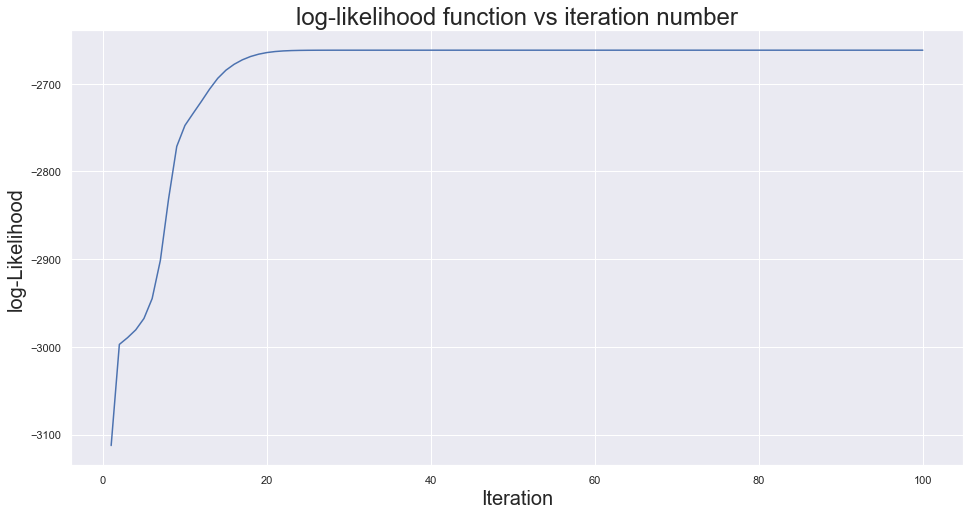

In [35]:
fig = plt.figure(figsize = (16,8))
x=np.arange(1,101,1)
y=MLE
plt.xlabel('Iteration',fontsize=20)
plt.ylabel('log-Likelihood',fontsize=20)
plt.title('log-likelihood function vs iteration number',fontsize=24)
plt.plot(x,y)

After 20 iteration, the log-likelihood does not change. Also, always log-likelihood is increasing.

## (c) Classify each observation into one of the two classes. Display the classiﬁcation results in a scatter plot with two diﬀerent colors. 

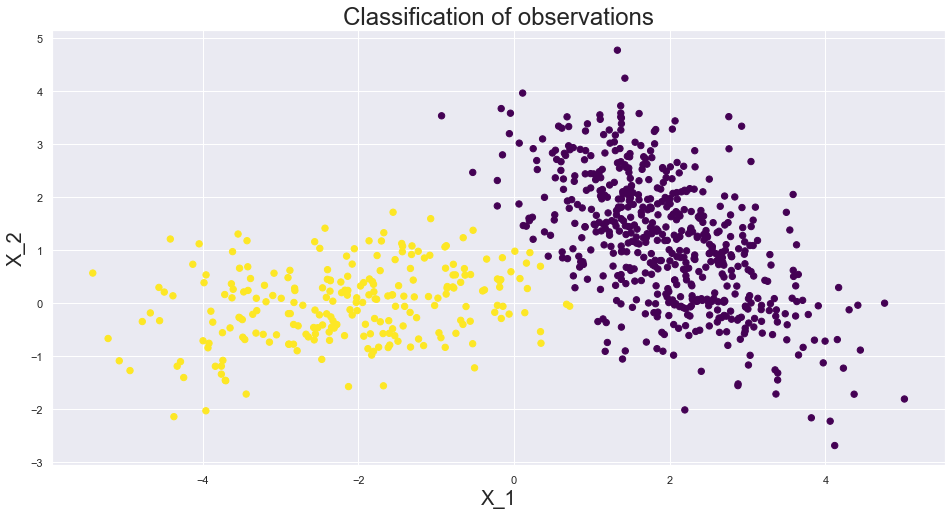

In [36]:
fig = plt.figure(figsize = (16,8))
labels = gmm_sklearn.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.xlabel('X_1',fontsize=20)
plt.ylabel('X_2',fontsize=20)
plt.title('Classification of observations',fontsize=24);

In [37]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

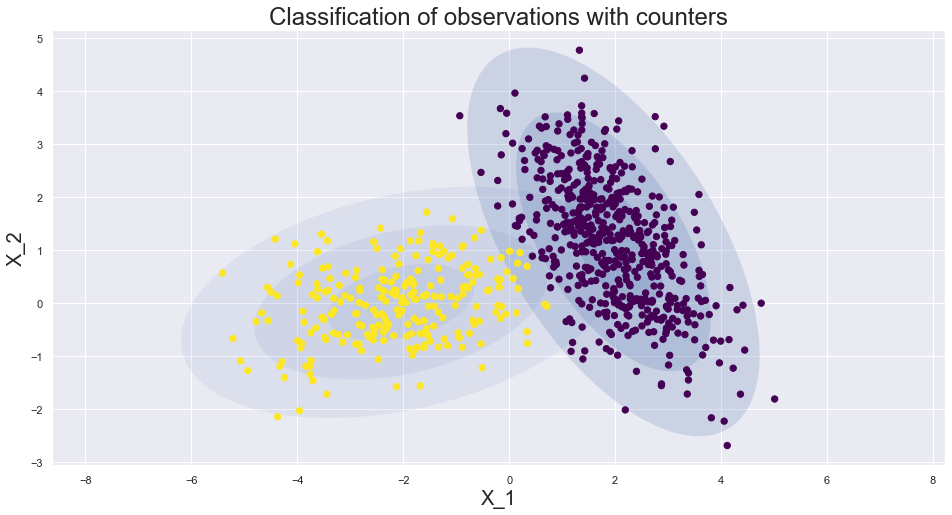

In [38]:
fig = plt.figure(figsize = (16,8))
plot_gmm(gmm_sklearn, X)
plt.xlabel('X_1',fontsize=20)
plt.ylabel('X_2',fontsize=20)
plt.title('Classification of observations with counters',fontsize=24);

## (d) Plot a surface plot of the ﬁtted PDF f(x; ˆ θ) .

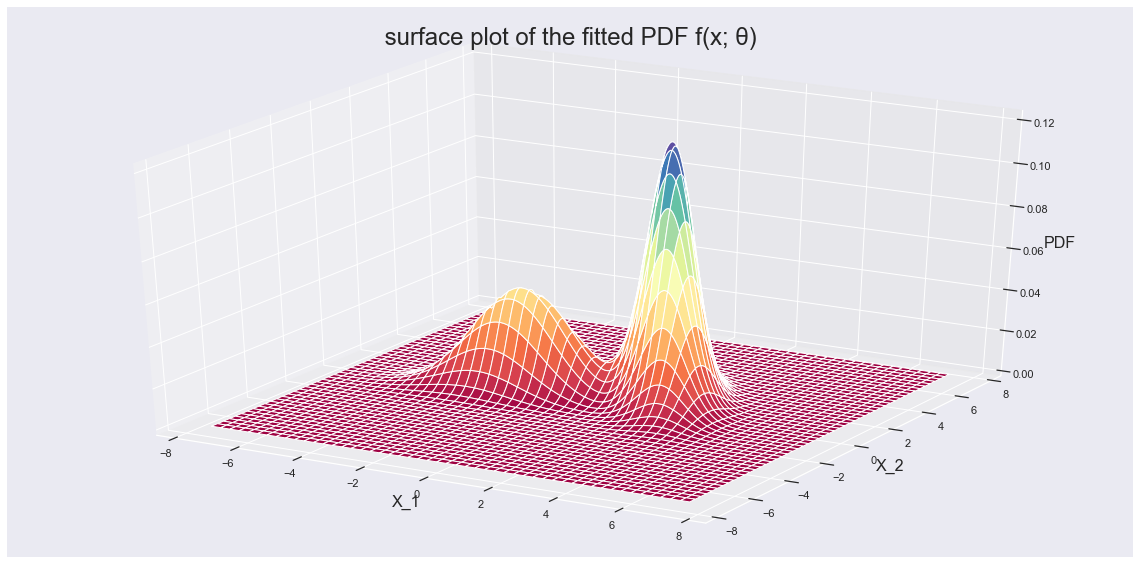

In [39]:
plot_contours(X,gmm.weights, gmm.means, gmm.covs, ' surface plot of the ﬁtted PDF f(x; θ) ')